Aim:

To evaluate given netowrk for different optimizers.

B071

Bhavya Singhal

70022000199

BTech CE

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
#x->features, y->labels
# making 1000 samples, 2 features with 3 centers and clusters that have deviation of 0.3 about the centers
x,y = make_blobs(1000, 2, centers=3, cluster_std=2, random_state=2)

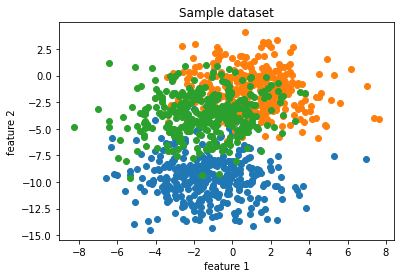

In [ ]:
for labels in range(3):
  row = np.where(y==labels)
  plt.title("Sample dataset")
  plt.xlabel("feature 1")
  plt.ylabel("feature 2")
  plt.scatter(x[row,0],x[row,1])

In [ ]:
y = to_categorical(y)

In [ ]:
n_train = 800
train_x, test_x = x[:n_train, :],x[n_train:,:]
train_y, test_y = y[:n_train, :],y[n_train:,:]

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
from keras.metrics import CategoricalCrossentropy

In [ ]:
def fit_model(train_x, train_y, test_x, test_y, mom):
  model = Sequential()
  model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(3, activation=tf.nn.softmax))
  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum = mom), loss= 'categorical_crossentropy', metrics='accuracy')
  history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=200)
  plt.plot(history.history['accuracy'],label='train')
  plt.plot(history.history['val_accuracy'],label='validation')
  plt.title('momentum = '+str(mom))


Epoch 1/200
25/25 [==============================] - 1s 10ms/step - loss: 1.1210 - accuracy: 0.5325 - val_loss: 0.6757 - val_accuracy: 0.7050
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.9967 - accuracy: 0.5750 - val_loss: 0.6537 - val_accuracy: 0.7350
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8089 - accuracy: 0.6363 - val_loss: 0.6906 - val_accuracy: 0.7350
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8395 - accuracy: 0.6313 - val_loss: 0.8175 - val_accuracy: 0.6000
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8304 - accuracy: 0.6313 - val_loss: 0.6084 - val_accuracy: 0.7450
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7149 - accuracy: 0.6538 - val_loss: 0.5994 - val_accuracy: 0.7300
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7999 - accuracy: 0.6413 - val_loss: 0.8171 - val_accuracy: 0.6000
Epoch 8/200


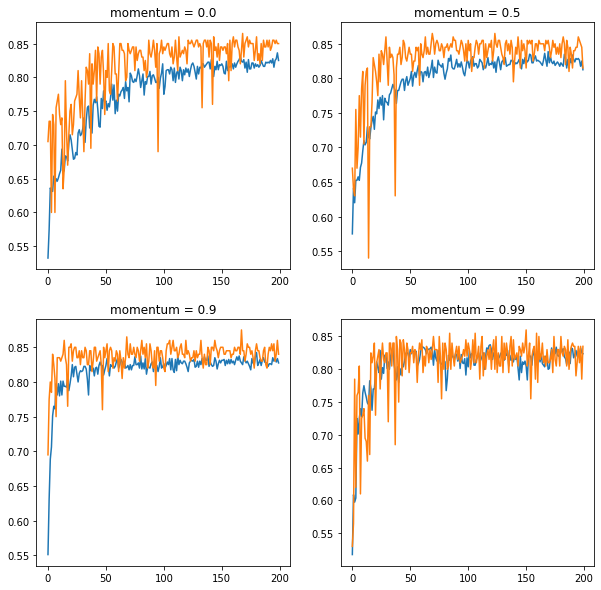

In [ ]:
mom_values = [0.0, 0.5, 0.9, 0.99]

plt.figure(figsize= (10,10))

for i in range(len(mom_values)):
  plt.subplot(2,2,i+1)
  fit_model(train_x, train_y, test_x, test_y, mom_values[i])

In [ ]:
def fit_model(train_x, train_y, test_x, test_y, opt):
  model = Sequential()
  model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(3, activation=tf.nn.softmax))
  model.compile(optimizer=opt, loss= 'categorical_crossentropy', metrics='accuracy')
  history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=200)
  plt.plot(history.history['accuracy'],label='train')
  plt.plot(history.history['val_accuracy'],label='validation')
  plt.title('optimizer = '+str(opt))

Epoch 1/200
25/25 [==============================] - 1s 8ms/step - loss: 1.2651 - accuracy: 0.5163 - val_loss: 1.0612 - val_accuracy: 0.5450
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 1.0039 - accuracy: 0.5425 - val_loss: 0.7281 - val_accuracy: 0.6350
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8109 - accuracy: 0.6187 - val_loss: 0.6909 - val_accuracy: 0.7600
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8171 - accuracy: 0.6438 - val_loss: 0.6313 - val_accuracy: 0.7600
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7569 - accuracy: 0.6463 - val_loss: 0.5795 - val_accuracy: 0.7150
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7299 - accuracy: 0.6662 - val_loss: 0.5674 - val_accuracy: 0.7350
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7340 - accuracy: 0.6700 - val_loss: 0.6359 - val_accuracy: 0.6700
Epoch 8/200
2

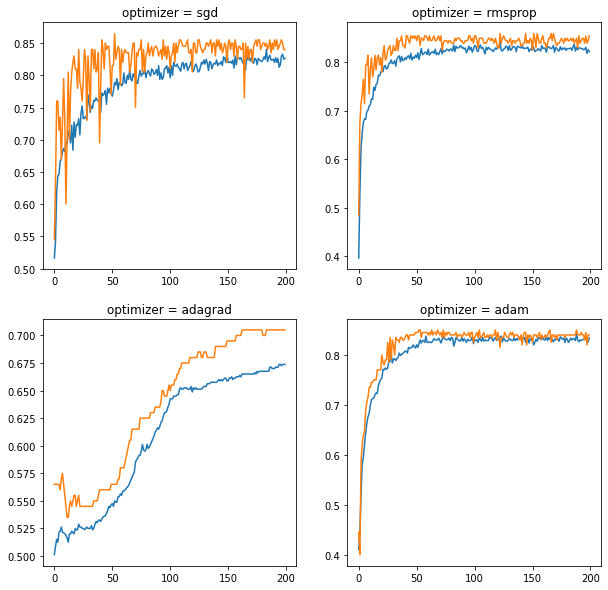

In [ ]:
opt = ['sgd','rmsprop', 'adagrad', 'adam']

plt.figure(figsize= (10,10))

for i in range(len(opt)):
  plt.subplot(2,2,i+1)
  fit_model(train_x, train_y, test_x, test_y, opt[i])

Conclusion:

SGD optimizer with momentum is used to train the network to classify the samples. 

For momentum = 0, validation accuracy is oscillating more than the accuracy for other values of momentum.

Among all the values of momentum, training and validation accuracy are almost the same for momentum = 0.99. Also, the training is converging in about 10 epochs.

When momentum is not used, accuracy is achieved with 50 epochs and with momentum accuracy is achieved with 10 epochs.

Network is trained for different types of optimizers, it can be shown that adam and rmsprop are almost the same and rmsprop is providing the best accuracy with least number of epochs.